#### Loan Default Prediction with Machine Learning
Part 2, Exploratory Data Analysis (EDA)

In [16]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 26 19:34:02 2024

@author: Felipe J

Loan Default Prediction pt.2, EDA.

"""

# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan_df = pd.read_csv('/Users/pjaram84/Desktop/Independent Pursuits/Machine Learning with CFI/Loan Default Prediction ML/data/vehicle_loans_clean.csv',
                      index_col='UNIQUEID')

In [17]:
#%% Visualize
# Use .info() to look at cols
loan_df.info() # The 4 columns we added during ETL are at the bottom. The only categorical 'object' 
               # column is the one we left on ETL to deal with here, for EDA.
    
# Column 'MOBILENO_AVL_FLAG' has only 1 unique value. All entries here are the same! It has no predicitve power!
loan_df.drop(columns=['MOBILENO_AVL_FLAG'], axis=1) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   DISBURSED_AMOUNT                     233154 non-null  int64  
 1   ASSET_COST                           233154 non-null  int64  
 2   LTV                                  233154 non-null  float64
 3   BRANCH_ID                            233154 non-null  int64  
 4   SUPPLIER_ID                          233154 non-null  int64  
 5   MANUFACTURER_ID                      233154 non-null  int64  
 6   CURRENT_PINCODE_ID                   233154 non-null  int64  
 7   EMPLOYMENT_TYPE                      233154 non-null  object 
 8   STATE_ID                             233154 non-null  int64  
 9   EMPLOYEE_CODE_ID                     233154 non-null  int64  
 10  MOBILENO_AVL_FLAG                    233154 non-null  int64  
 11  AADHAR_F

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,EMPLOYMENT_TYPE,STATE_ID,EMPLOYEE_CODE_ID,...,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE,DISBURSAL_MONTH,AVERAGE_ACCT_AGE_MONTHS,CREDIT_HISTORY_LENGTH_MONTHS
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,Salaried,6,1998,...,0,0,0,0,0,0,34,8,0,0
537409,47145,65550,73.23,67,22807,45,1502,Self employed,6,1998,...,1991,0,0,1,0,1,33,9,23,23
417566,53278,61360,89.63,67,22807,45,1497,Self employed,6,1998,...,0,0,0,0,0,0,32,8,0,0
624493,57513,66113,88.48,67,22807,45,1501,Self employed,6,1998,...,31,0,0,0,1,1,24,10,8,15
539055,52378,60300,88.39,67,22807,45,1495,Self employed,6,1998,...,0,0,0,0,1,1,40,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626432,63213,105405,60.72,34,20700,48,1050,Salaried,6,3705,...,4084,0,0,0,0,0,30,10,21,39
606141,73651,100600,74.95,34,23775,51,990,Self employed,6,3705,...,1565,0,0,0,0,0,29,10,6,6
613658,33484,71212,48.45,77,22186,86,2299,Salaried,4,3479,...,0,0,0,0,0,0,42,10,0,0


#### Categorical Columns
Non-numeric columns with potentail predictive power.

<AxesSubplot:xlabel='MANUFACTURER_ID', ylabel='count'>

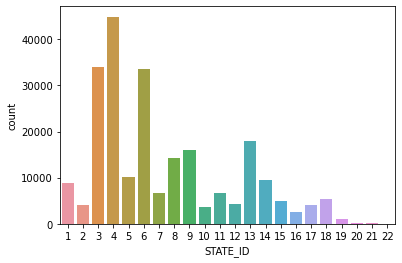

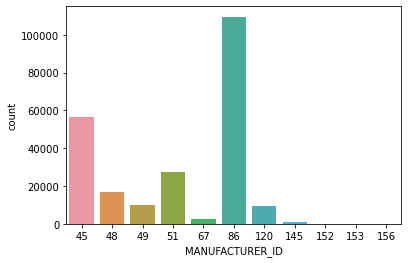

In [18]:
#%% Dealing with Category or ID Columns
#Sample the ID columns
loan_df[['SUPPLIER_ID', 'CURRENT_PINCODE_ID', 'EMPLOYEE_CODE_ID', 'BRANCH_ID', 'STATE_ID', 'MANUFACTURER_ID']].sample(10)

# Some of these columns have high amounts of unique values, we'll remove those (usually ID columns).
loan_df = loan_df.drop(columns=['SUPPLIER_ID', 'CURRENT_PINCODE_ID', 'EMPLOYEE_CODE_ID', 'BRANCH_ID'], axis=1)

# Take a closer look at the other two ID columns we did not drop.
loan_df['STATE_ID'].value_counts()                   # Amount of entires per category
loan_df['STATE_ID'].value_counts(normalize=True)     # Percent of entries per category
plt.figure(1)
sns.countplot(x=loan_df['STATE_ID'], data=loan_df)

loan_df['MANUFACTURER_ID'].value_counts()                # Note 'Manufacturer_ID' is unevenly distributed, with lots of entires
loan_df['MANUFACTURER_ID'].value_counts(normalize=True)  # concentrated in one value, and very few in others. This could be because 
plt.figure(2)                                            # (e.g) one manufacturer is larger, or perhaps (e.g) due to cost (one is too expensive).    
sns.countplot(x=loan_df['MANUFACTURER_ID'], data=loan_df)

In [19]:
# Group w/ .groupby()  # We'll group Manufacturer column to see if its related to our target (Y)
# Looking at deafult frequency within groups
loan_df.groupby('MANUFACTURER_ID')['LOAN_DEFAULT'].value_counts().unstack(level=-1) # This line arranges Loan Default value counts per manufacturer.
loan_df.groupby('MANUFACTURER_ID')['LOAN_DEFAULT'].value_counts(normalize=True).unstack(level=-1) # This line arranges likewise but by percentage.

LOAN_DEFAULT,0,1
MANUFACTURER_ID,,
45,0.771501,0.228499
48,0.727469,0.272531
49,0.781213,0.218787
51,0.792053,0.207947
67,0.782536,0.217464
86,0.795406,0.204594
120,0.779250,0.220750
145,0.799486,0.200514
152,1.000000,NaN


#### Continuous Variables 
Numercial features, understanding and visualizing input variables.

/Users/pjaram84/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='LOAN_DEFAULT'>

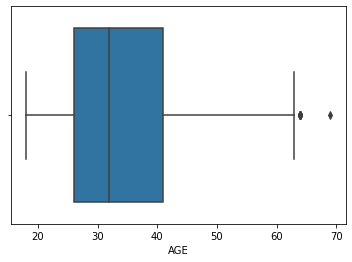

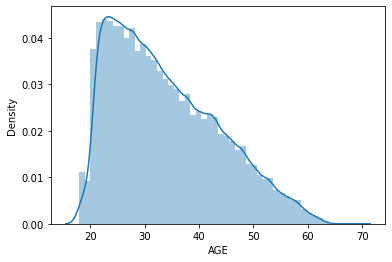

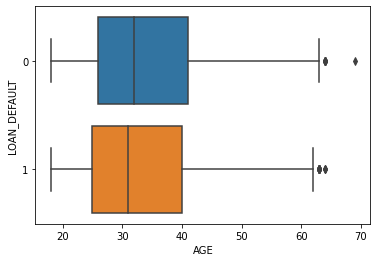

In [20]:
#%% Continuous Variables

# pandas .describe() function gives generates statistical summaries!
loan_df['AGE'].describe()          # Youngest & oldest loan applicants are 17 and 69 years old. Not errors (reasonable ages).
plt.figure(3)                      # Mean is 33 and median 32, which suggests little skew.
sns.boxplot(x='AGE', data=loan_df) # The max is 69 but 75% qtl is 41, so our distribution likely has right tail.
plt.figure(4)
sns.distplot(loan_df['AGE'])       # Great to show prob. distribution. We see there's less loan applications as age increases.
# Interesting. What about Age related to Loan Default:
loan_df.groupby('LOAN_DEFAULT')['AGE'].describe() # And we get summary stats of deault or not, regarding age. 
                                                  # People who defaulted are younger (mean).
plt.figure(5) # We can plot such finding as well.
sns.boxplot(x=loan_df['AGE'], y='LOAN_DEFAULT', data=loan_df, orient='h') # The age difference's mean for this groups is very narrow,
                                                                          # not enough to be a standalone determinant factor.

#### Function to perform EDA on different features

In [21]:
# Create Reusable code to perform EDA like we did on 'AGE.'
def explore_continuous(col_name):
    # Print Statistical Summary
    print("{0} Summary:".format(col_name)) # Writes "Summary: [col_name]"
    print("\n")
    print(loan_df[col_name].describe()) # Prints the actual summary stats.
    print("\n")
    
    # Look at Boxplot
    plt.figure(6)
    sns.boxplot(x=col_name, data=loan_df)
    plt.show()
    
    # Look at Distribution
    plt.figure(7)
    sns.distplot(loan_df[col_name])
    plt.show()
    
    # Look deeper by grouping with our target variable
    print("{0} Grouped Summary:".format(col_name))
    print("\n")
    print(loan_df.groupby('LOAN_DEFAULT')[col_name].describe())
    
    # Looked at grouped boxplot
    plt.figure(8)
    sns.boxplot(x=col_name, y='LOAN_DEFAULT', data=loan_df, orient='h')
    plt.show()
# Try calling it with differrent features, e.g:  explore_continuous('DISBURSED_AMOUNT')

DISBURSED_AMOUNT Summary:


count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64




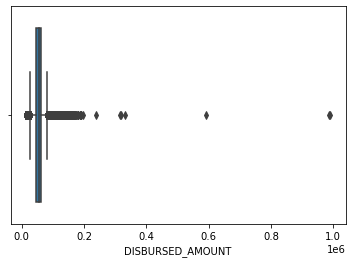

/Users/pjaram84/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


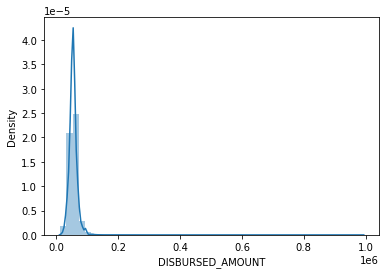

DISBURSED_AMOUNT Grouped Summary:


                 count          mean           std      min      25%      50%  \
LOAN_DEFAULT                                                                    
0             182543.0  53826.471111  13140.699007  13320.0  46369.0  53303.0   
1              50611.0  56270.473869  12150.255527  13369.0  49303.0  55459.0   

                  75%       max  
LOAN_DEFAULT                     
0             59947.0  990572.0  
1             61947.0  191392.0  


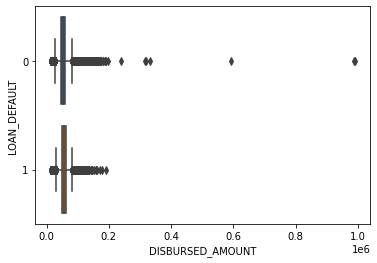

In [23]:
explore_continuous('DISBURSED_AMOUNT')

In [ ]:
Steps Ahead – Summary – Saving changes

In [25]:
#%% Binary Variables
# Our data contaiins several columns with the underscore _Flag. This are binary (0 and 1).

# We can repeat the above steps on our ' _FLAG ' columns to understand relationship
# between each of our binary features and the target variable (Y).

#%% Save to new File 
loan_df.to_csv('/Users/pjaram84/Desktop/Independent Pursuits/Machine Learning with CFI/Loan Default Prediction ML/data/vehicle_loans_clean_eda.csv')

In [ ]:

#%% Summary
"""Summary:
- Explored and Plotted some of the most important features. Seaborn package allows you to plot 
all features against all other features. 
- Created a reusable function to perform EDA on any continuous features of the data set. 
- We begin to understand how these features relate to our target variable, loan defaults (Y)
"""